# Filtering structures by quality
In this notebook, we filter structures from the paired structures dataset according to their resolution and R-free

In [1]:
import pandas as pd
from pathlib import Path

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

global RESOLUTION_CUTOFF
RESOLUTION_CUTOFF = 3
global RFREE_CUTOFF
RFREE_CUTOFF = .3


In [2]:
data_path = Path("../data/raw/pdb_pairs/")

quality_df = pd.read_csv(data_path / "quality_df.csv")
df = pd.read_csv(data_path / "phosphorylated_residues_renamedchains.csv")


<AxesSubplot:xlabel='resolution', ylabel='rfree'>

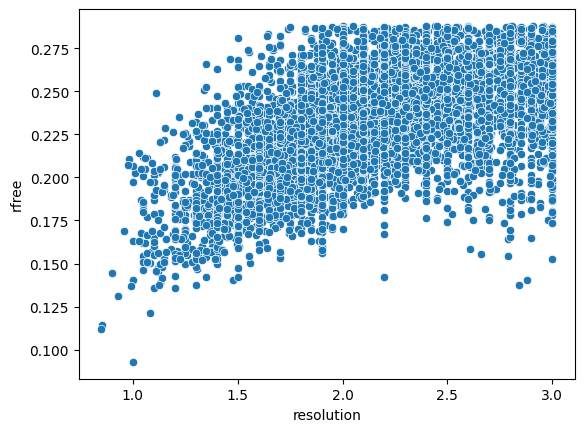

In [3]:
sns.scatterplot(data=quality_df,x="resolution",y="rfree")

In [14]:
# Drop chains that we could not rename to make them available in PDB
df.dropna(subset = ['RENAMED_ASYM_ID_ONE','RENAMED_ASYM_ID_TWO'], inplace=True)

In [15]:
valid_pdb_ids = list(quality_df["pdb_id"].unique())
valid_pdb_ids = [x.lower() for x in valid_pdb_ids]

In [16]:
print(f"How many PDB identifiers pass the filter? {len(valid_pdb_ids)}")

How many PDB identifiers pass the filter? 7808


In [17]:
filtered_df = df.loc[(df["ENTRY_ID_ONE"].isin(valid_pdb_ids)) & (df["ENTRY_ID_TWO"].isin(valid_pdb_ids))]

In [18]:
print("How many unique proteins in the original dataset?")
print(len(df["UNIPROT"].unique()))
print("How many unique proteins after filtering for structure quality?")
print(len(filtered_df["UNIPROT"].unique()))

484
391


In [19]:
filtered_df.drop("Unnamed: 0",axis=1,inplace=True)
filtered_df.to_csv(data_path / "phosphorylated_residues_filtered_quality.csv",index=None)

/tmp/ipykernel_250727/713001160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("Unnamed: 0",axis=1,inplace=True)


In [21]:
quality_df = pd.read_csv("../data/raw/pdb_pairs/quality_df.csv")

(-1.1024571078840553,
 1.100117005137336,
 -1.1071527325001673,
 1.1063376479186213)

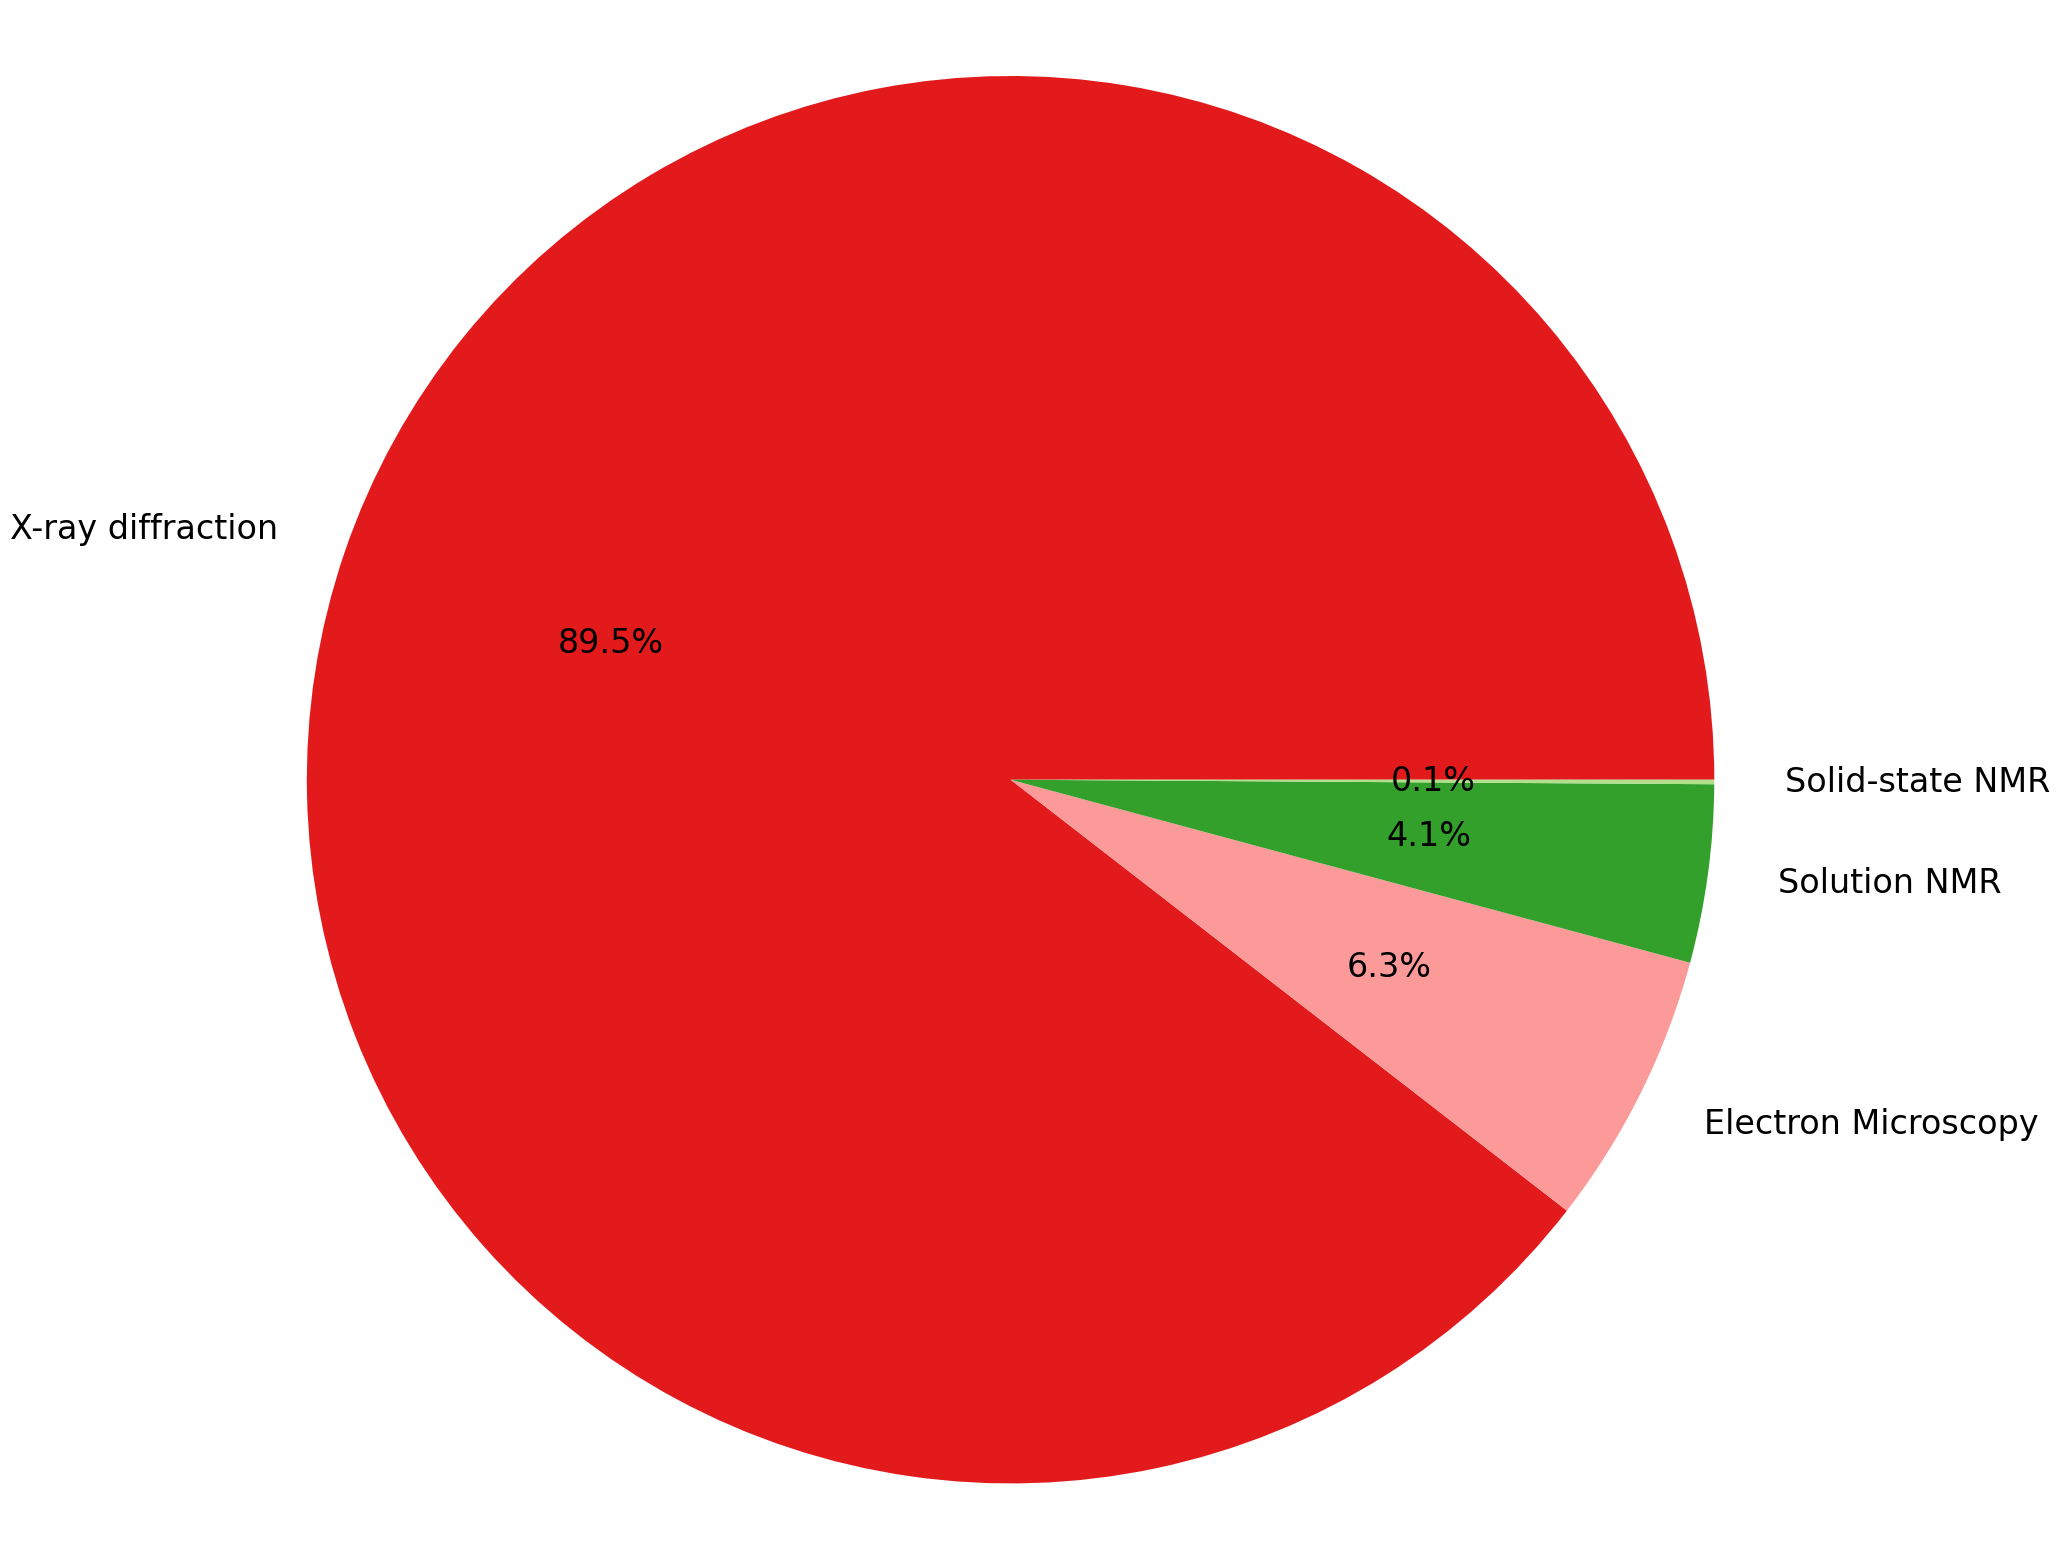

In [31]:
# Pie chart of resolution methods
counter = Counter(quality_df["method"])
sns.set_context("paper")
method_labels = list(counter.keys())
method_values = list(counter.values())

fig1, ax1 = plt.subplots(figsize=(20,20))
methods_palette = sns.color_palette("Paired",18)[::-1]
ax1.pie(method_values,labels=method_labels,colors=methods_palette, 
        autopct='%1.1f%%',textprops={'fontsize': 24})
ax1.axis('equal')

plt.savefig(str(out_path/"filtered_species_pie.png"),bbox_inches='tight',dpi=200)

[6989, 492, 319, 8]